In [3]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

CUDA available: True
GPU: Tesla T4


In [4]:
!pip install -q ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.9 MB/s eta 0:00:00


In [5]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhrumil1701","key":"4a9dff7a43c017497a5e9124b54a35a8"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d snehilsanyal/weapon-detection-test
!unzip -o weapon-detection-test.zip


Dataset URL: https://www.kaggle.com/datasets/snehilsanyal/weapon-detection-test
License(s): CC0-1.0
 61% 119M/194M [00:00<00:00, 1.20GB/s]
100% 194M/194M [00:00<00:00, 850MB/s] 
Archive:  weapon-detection-test.zip
  inflating: metadata.csv            
  inflating: test/test/army.jpg      
  inflating: test/test/giphy.gif     
  inflating: test/test/mafia-mafia-game.gif  
  inflating: test/test/terrorists.jpg  
  inflating: test/test/terrorists2.jpg  
  inflating: test/test/weapons.jpg   
  inflating: test/test/weapons2.jpg  
  inflating: test/test/weaponsgta5.gif  
  inflating: weapon_detection/train/images/Automatic Rifle_10.jpeg  
  inflating: weapon_detection/train/images/Automatic Rifle_100.jpeg  
  inflating: weapon_detection/train/images/Automatic Rifle_11.jpeg  
  inflating: weapon_detection/train/images/Automatic Rifle_12.jpeg  
  inflating: weapon_detection/train/images/Automatic Rifle_14.jpeg  
  inflating: weapon_detection/train/images/Automatic Rifle_15.png  
  inflating: w

In [8]:
!ls weapon_detection
!ls weapon_detection/train
!ls weapon_detection/train/images | head
!ls weapon_detection/train/labels | head


train  val
images	labels
Automatic Rifle_100.jpeg
Automatic Rifle_10.jpeg
Automatic Rifle_11.jpeg
Automatic Rifle_12.jpeg
Automatic Rifle_14.jpeg
Automatic Rifle_15.png
Automatic Rifle_16.png
Automatic Rifle_17.jpeg
Automatic Rifle_18.png
Automatic Rifle_20.jpeg
Automatic Rifle_100.txt
Automatic Rifle_10.txt
Automatic Rifle_11.txt
Automatic Rifle_12.txt
Automatic Rifle_14.txt
Automatic Rifle_15.txt
Automatic Rifle_16.txt
Automatic Rifle_17.txt
Automatic Rifle_18.txt
Automatic Rifle_20.txt


In [9]:
%%writefile weapon_data.yaml

path: weapon_detection
train: train/images
val: val/images

nc: 1
names: ['weapon']


Writing weapon_data.yaml


In [10]:
!find weapon_detection/train/labels -type f | head -1
!head -5 $(find weapon_detection/train/labels -type f | head -1)


weapon_detection/train/labels/Shotgun_82.txt
0 0.500500 0.506006 0.793000 0.687688


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="weapon_data.yaml",
    epochs=20,
    imgsz=640,
    batch=8,
    name="weapon_yolov8"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=weapon_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db7e0889eb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [12]:
model.val()

Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1204.7±1464.7 MB/s, size: 497.0 KB)
val: Scanning /content/weapon_detection/val/labels.cache... 143 images, 0 backgrounds, 42 corrupt: 100% ━━━━━━━━━━━━ 143/143 33.5Kit/s 0.0s
val: /content/weapon_detection/val/images/Bazooka_44.jpeg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/weapon_detection/val/images/Grenade Launcher_13.jpeg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/weapon_detection/val/images/Grenade Launcher_47.jpeg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/weapon_detection/val/images/SMG_16.jpeg: ignoring corrupt image/label: Label class 1 ex

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db802f791f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [28]:
from google.colab import files
uploaded = files.upload()

Saving weapons2.jpg to weapons2.jpg


In [29]:
from ultralytics import YOLO

# Load trained model (use your path if different)
model = YOLO("runs/detect/weapon_yolov8/weights/best.pt")

results = model.predict(
    source="weapons2.jpg",   # the image you uploaded
    conf=0.4,
    save=True
)


image 1/1 /content/weapons2.jpg: 448x640 1 weapon, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict4


(np.float64(-0.5), np.float64(735.5), np.float64(489.5), np.float64(-0.5))

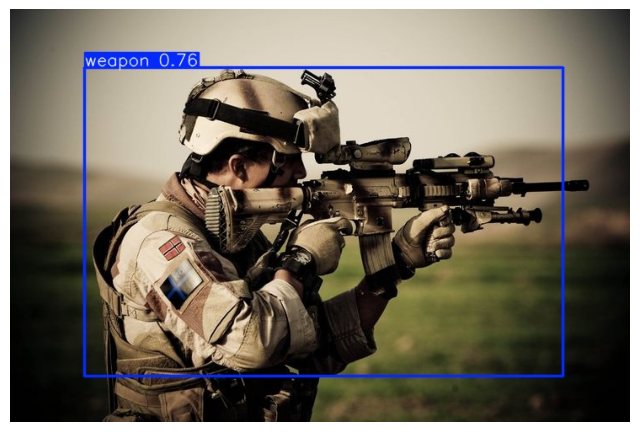

In [30]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(results[0].save_dir + "/" + results[0].path.split("/")[-1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
